In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('data/db_tweet_emotion.csv', encoding= 'unicode_escape')

In [6]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [7]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [8]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [9]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

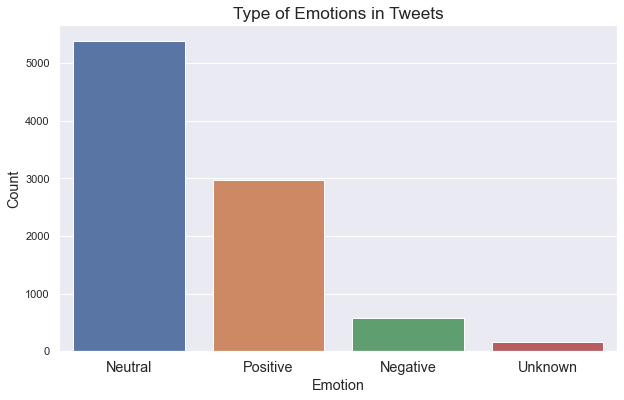

In [10]:
# visualize the counts of each emotion type
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(
    data=df, 
    x="is_there_an_emotion_directed_at_a_brand_or_product",
    order=df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts().index)

ax.set_title('Type of Emotions in Tweets',fontsize='x-large')
ax.set_xlabel('Emotion',fontsize='large')
ax.set_ylabel('Count',fontsize='large')
plt.xticks(range(4), ['Neutral','Positive','Negative','Unknown'],fontweight='light', fontsize='large')

plt.show();

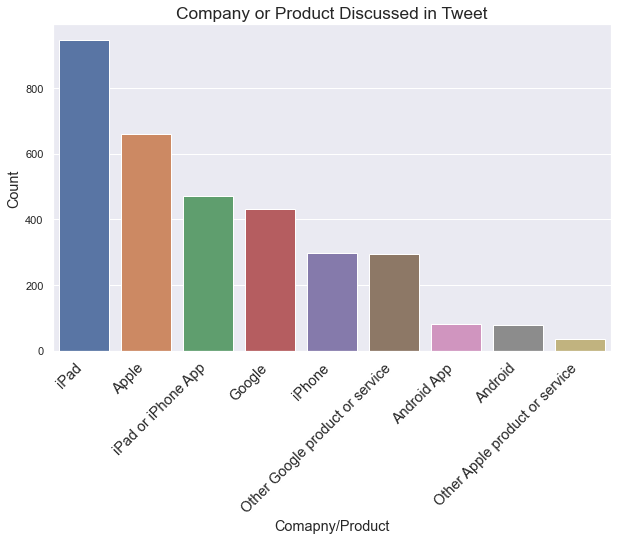

In [11]:
#visualize the counts of company/product discussed in tweets
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(
    data=df, 
    x="emotion_in_tweet_is_directed_at", order=df["emotion_in_tweet_is_directed_at"].value_counts().index)

ax.set_title('Company or Product Discussed in Tweet', fontsize='x-large')
ax.set_xlabel('Comapny/Product',fontsize='large')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')
ax.set_ylabel('Count',fontsize='large')

plt.show();

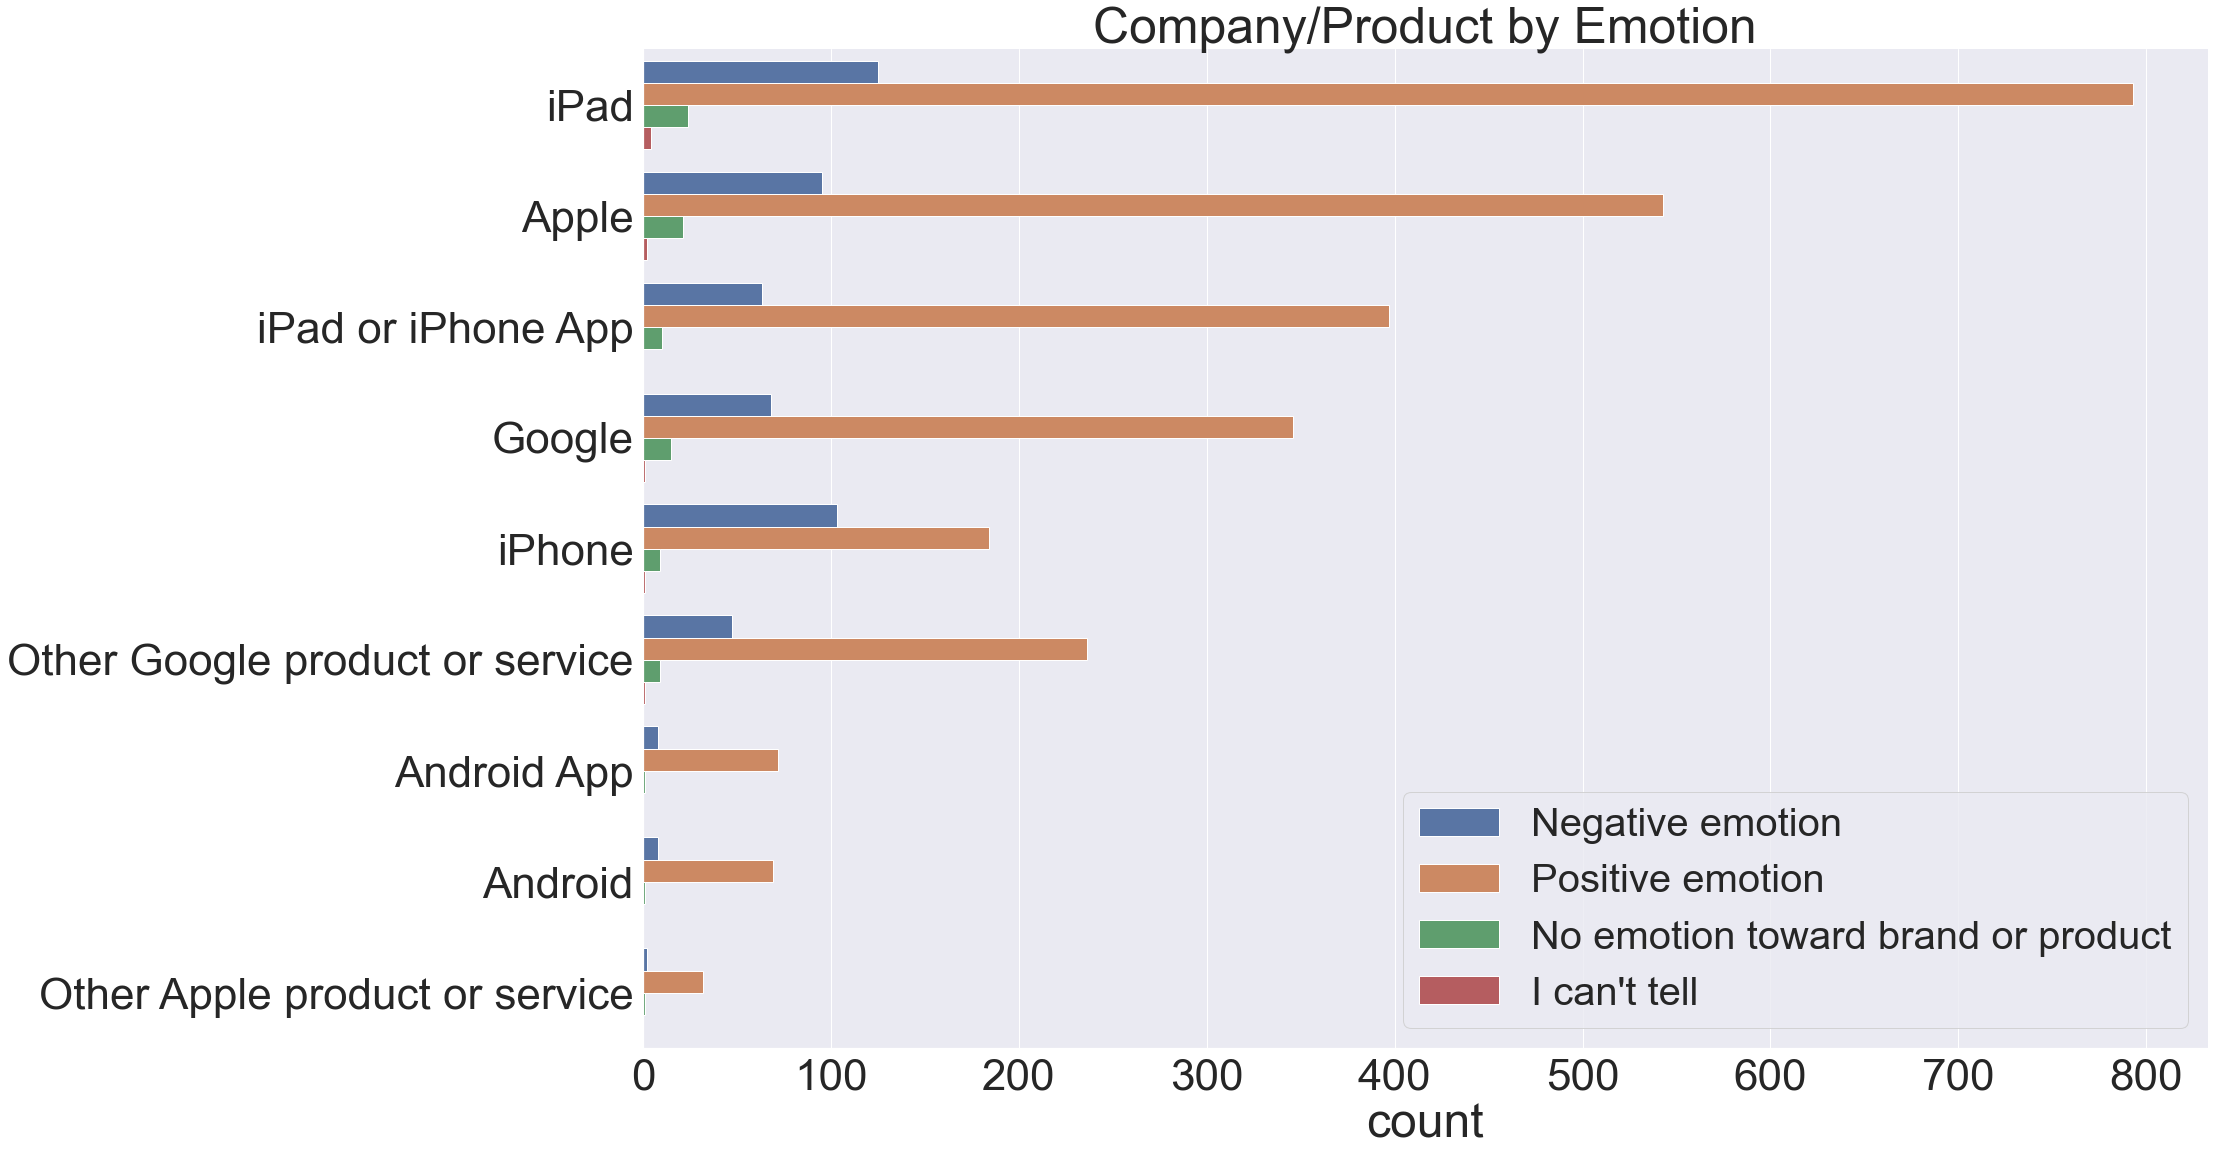

In [13]:
# visualize company/product mentioned by emotion
sns.set_theme(style = "darkgrid", font_scale=4)
ax=sns.catplot(y="emotion_in_tweet_is_directed_at", hue="is_there_an_emotion_directed_at_a_brand_or_product", legend = False,
             order=df["emotion_in_tweet_is_directed_at"].value_counts().index,
            kind="count", data=df,height=16,aspect=2)
plt.title('Company/Product by Emotion', size=50)
plt.ylabel('')
plt.legend(title="", loc=4, fontsize='small', fancybox=True);


In [14]:
import matplotlib.ticker as mtick

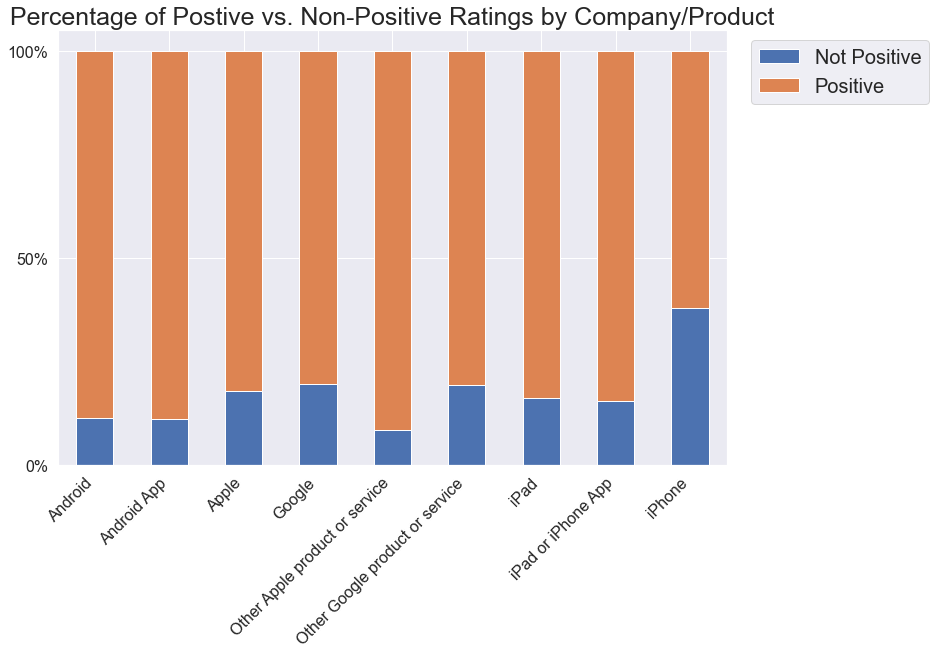

In [15]:
# visualize company/product mentioned by positive/non-positive emotion

df['pos_neg_neutral']=df['is_there_an_emotion_directed_at_a_brand_or_product'] == "Positive emotion"


df.groupby(['emotion_in_tweet_is_directed_at','pos_neg_neutral']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, figsize=(12,8), legend="reverse")


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.legend(bbox_to_anchor= (1.02, 1),prop = {'size' : 20},labels=("Not Positive", "Positive"))
plt.xlabel('')
plt.xticks(fontsize=16,rotation=45,horizontalalignment='right', fontweight='light')
plt.yticks(fontsize=16)
plt.title('Percentage of Postive vs. Non-Positive Ratings by Company/Product', size=25)
plt.show()

In [16]:
#from weston
df['brand'] = df['emotion_in_tweet_is_directed_at']

df['brand'] = df['brand'].replace('iPad', 'Apple')
df['brand'] = df['brand'].replace('iPad or iPhone App', 'Apple')
df['brand'] = df['brand'].replace('iPhone', 'Apple')
df['brand'] = df['brand'].replace('Other Apple product or service', 'Apple')

df['brand'] = df['brand'].replace('Other Google product or service', 'Google')
df['brand'] = df['brand'].replace('Android App', 'Google')
df['brand'] = df['brand'].replace('Android', 'Google')

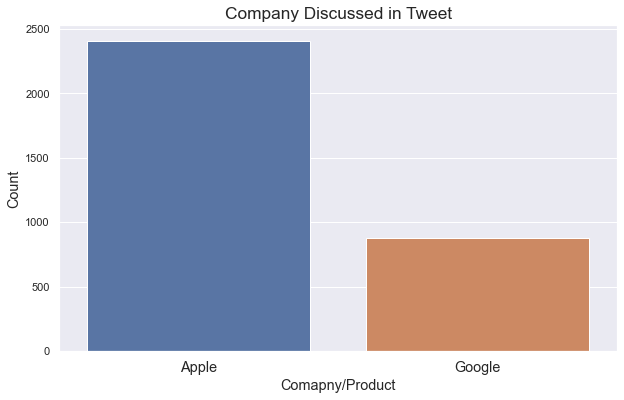

In [17]:
#visualize the counts of company discussed in tweets
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(
    data=df, 
    x="brand", order=df["brand"].value_counts().index)

ax.set_title('Company Discussed in Tweet', fontsize='x-large')
ax.set_xlabel('Comapny/Product',fontsize='large')

ax.set_xticklabels(ax.get_xticklabels(),fontweight='light', fontsize='large')
ax.set_ylabel('Count',fontsize='large')

plt.show();

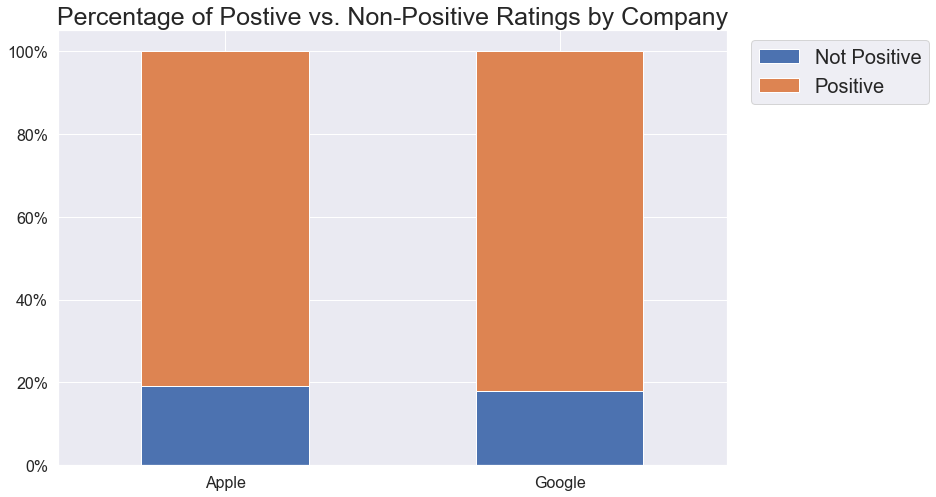

In [18]:
# visualize company/product mentioned by positive/non-positive emotion


df.groupby(['brand','pos_neg_neutral']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, figsize=(12,8), legend="reverse")


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.legend(bbox_to_anchor= (1.02, 1),prop = {'size' : 20},labels=("Not Positive", "Positive"))
plt.xlabel('')
plt.xticks(fontsize=16,fontweight='light',rotation=0)
plt.yticks(fontsize=16)
plt.title('Percentage of Postive vs. Non-Positive Ratings by Company', size=25)
plt.show()

In [19]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
df['tweet_text'].isna().sum()

1

In [23]:
df.dropna(subset = ['tweet_text'], inplace=True)

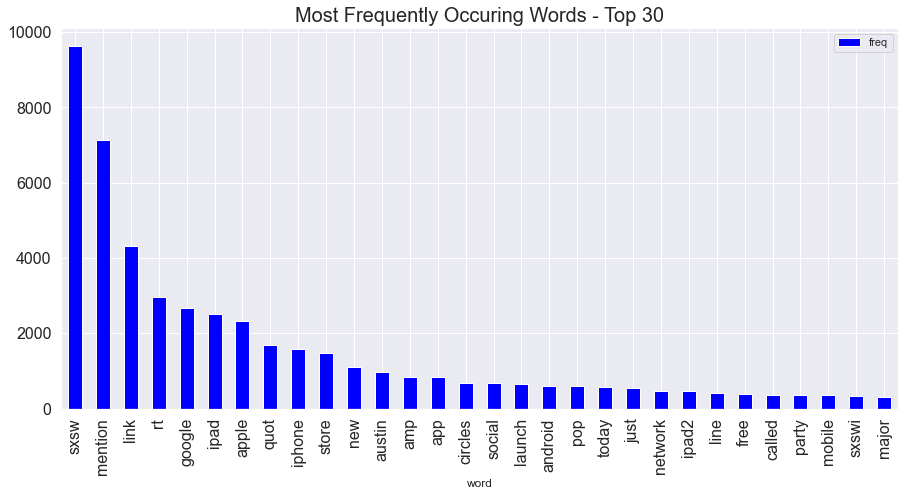

In [24]:
#see frequencies of top 30 words
cv = CountVectorizer(stop_words = 'english')

words = cv.fit_transform(df.tweet_text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')

plt.title("Most Frequently Occuring Words - Top 30", size=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

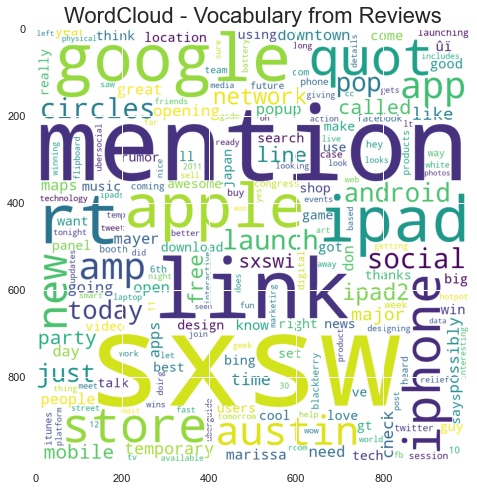

In [25]:
#create wordcloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22);